No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


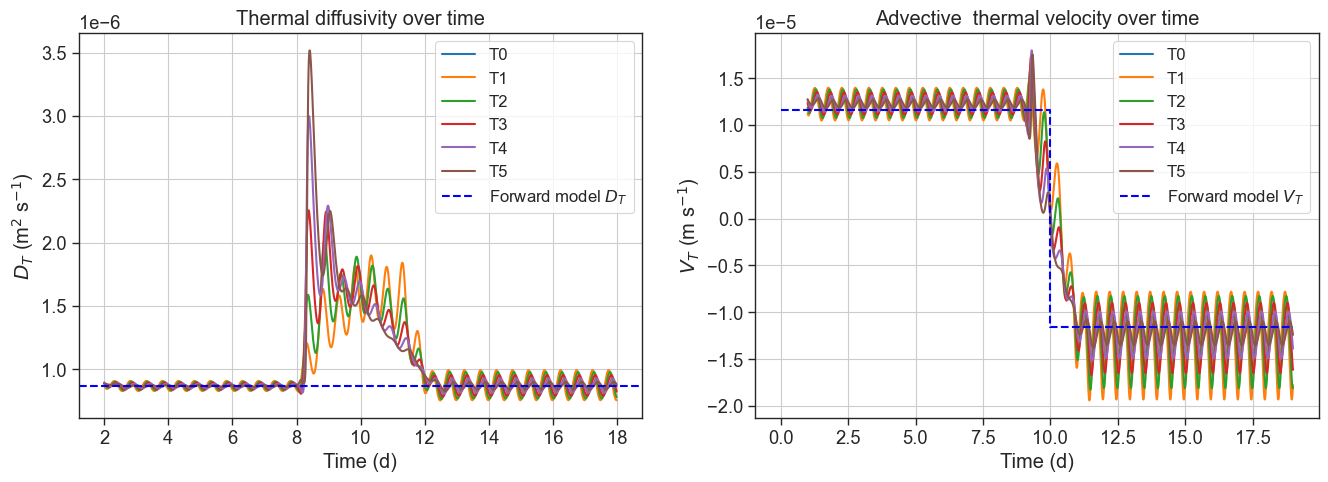

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn style
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})

# Data for dt_4.ipynb (First Notebook)
df_dt = pd.read_csv('dt_B.csv')
df_dt

# Conversion factor from seconds to days for dt_4
seconds_per_day = 24 * 3600

# Convert 'Time' from seconds to days for dt_4
df_dt['Time'] = df_dt['Time'] / seconds_per_day

# Fill NaN values with the mean of their respective columns for dt_4
df_dt.fillna(df_dt.mean(), inplace=True)

# Data for vt_4.ipynb (Second Notebook)
df_vt = pd.read_csv('vt_B.csv')
df_vt

# Conversion factor from seconds to days for vt_4
df_vt['Time'] = df_vt['Time'] / seconds_per_day

# Fill NaN values with the mean of their respective columns for vt_4
df_vt.fillna(df_vt.mean(), inplace=True)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plot dt data
axes[0].set_title('Thermal diffusivity over time')
for column in df_dt.columns[1:7]:
    axes[0].plot(df_dt['Time'], df_dt[column], label=column)
axes[0].set_xlabel('Time (d)')
axes[0].set_ylabel(r'$D_{T}$ (m$^{2}$ s$^{-1}$)')  # Using LaTeX for subscript
axes[0].grid(True)
axes[0].legend(fontsize=10)

# Define constant DT
average_dt = 0.075 / seconds_per_day

# Overlay the constant DT on the dt plot
axes[0].axhline(y=average_dt, linestyle='--', color='b', label=r'Forward model $D_{T}$')
axes[0].legend(fontsize=12)


axes[1].set_xlabel('Time (d)')
axes[1].set_ylabel(r'$V_{T}$ (m s$^{-1}$)')  # Using LaTeX for subscript this needs to be in m/s *24 *3600
axes[1].grid(True)
axes[1].legend(fontsize=12)

# Plot vt data
axes[1].set_title('Advective  thermal velocity over time')
for column in df_vt.columns[1:7]:
    axes[1].plot(df_vt['Time'], df_vt[column] / 0.6653236858608443, label=column)
axes[1].set_xlabel('Time (d)')
axes[1].set_ylabel(r'$V_{T}$ (m s$^{-1}$)')  # Using LaTeX for subscript
axes[1].grid(True)
#axes[1].legend
# Define step change parameters
day_10 = 10
step_change_time = [0, day_10, day_10, df_vt['Time'].max()]
step_change_value = [1, 1, -1, -1]
#number = seconds_per_day

# Correct the division by using a list comprehension
#step_change_value = [val / number for val in step_change_value]

# Overlay the step change on the vt plot
axes[1].plot(step_change_time, step_change_value, linestyle='--', color='b', label=r'Forward model $V_{T}$')
axes[1].legend(fontsize=12)


plt.savefig('step_dt_vt_B_first6', dpi=300)
# Show the plots
plt.show()
